<a href="https://colab.research.google.com/github/shattl/HackPromoAnalytics/blob/main/task_1_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('lenta.csv')

In [ ]:
train = train[train.columns[1:]]

In [ ]:
off = pd.read_csv('/content/20210521_offers.csv')

In [ ]:
off

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group
0,Facades,F26,71c770923102af052f64c6036c9dd590,20200213,20200219,train
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,20200102,20200108,train
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,20200116,20200122,train
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,20200319,20200325,train
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,20201112,20201118,test
...,...,...,...,...,...,...
9771,Biweekly,683,0f368be7897dd1531e43dc37115eeaf0,20191114,20191127,train
9772,Biweekly,691,47c28bf957fe120f2d016e46911e5bdb,20191114,20191127,train
9773,Biweekly,683,00432d021eca6059fee2ed69a732c2b2,20191114,20191127,train
9774,Biweekly,690,40d78b3648a4ea15f300070a0ffd9752,20191114,20191127,train


In [ ]:
off.start_date = pd.to_datetime(off.start_date.map(lambda x: str(x)[:4]+ '-' + str(x)[4:6]+'-' +str(x)[6:]))
off.end_date = pd.to_datetime(off.end_date.map(lambda x: str(x)[:4]+ '-' + str(x)[4:6]+'-' +str(x)[6:]))

In [ ]:
off_train, off_test = off[off.train_test_group == 'train'].drop(['train_test_group'], axis=1), off[off.train_test_group == 'test'].drop(['train_test_group'], axis=1)

In [ ]:
train = train.merge(off_train[['Offer_ID', 'start_date', 'end_date']].drop_duplicates(), on=['Offer_ID'])

In [ ]:
off_train[off_train['Offer_ID'] == 'F26']

,Promo_type,Offer_ID,sku,start_date,end_date
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19
112,Facades,F26,b178ad83d2ed46e4ca3b7d6bf3e50baa,2020-02-13,2020-02-19
156,Facades,F26,bc169501599f610c529db4962942d80d,2020-02-13,2020-02-19
163,Facades,F26,bc5f3166f87117e513a68ba6bad1d2da,2020-02-13,2020-02-19
204,Facades,F26,aa4dfbef8de268ea041b073c0b06c460,2020-02-13,2020-02-19
228,Facades,F26,3dccf48e3bb5c393c5c8c7d479b8395b,2020-02-13,2020-02-19
247,Facades,F26,e015fab8b16757eacf67128138d35569,2020-02-13,2020-02-19
254,Facades,F26,ddeb01bce36693b6f1d3bfec12c8b1e5,2020-02-13,2020-02-19
258,Facades,F26,9d34169d44a6dbbd3f00f6a734805a5f,2020-02-13,2020-02-19
266,Facades,F26,652832505970c306c01774f74b0a92de,2020-02-13,2020-02-19


In [ ]:
off_test

,Promo_type,Offer_ID,sku,start_date,end_date
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,2020-11-12,2020-11-18
6,Billboards,B86,cdab3403355b7fda81a1329b2f05cdec,2020-10-29,2020-11-11
18,Facades,F172,723dad25536c2cf3fb4fd3f577ee2b7c,2020-10-15,2020-10-21
23,Billboards,B96,9817112604594b376adf135efe787bbc,2020-12-03,2020-12-09
26,Facades,F173,b8169608d99f3a31891379d394735732,2020-10-14,2020-10-21
...,...,...,...,...,...
7861,Seasonal,99,fc2fe174d3547a2d077bb94742977bdb,2020-10-06,2020-10-19
8003,Billboards,B140,7a8675a8f6988ebcbefd062fabaccc85,2020-12-24,2020-12-30
8004,Billboards,B140,787762f7d829ce318599bf015baba175,2020-12-24,2020-12-30
8008,Billboards,B140,c8ac520562ba934dd67cbf0f060c4252,2020-12-24,2020-12-30


In [ ]:
test = off_test

In [ ]:
hie = pd.read_csv('/content/20210518_hierarchy.csv')

In [ ]:
new_hie = hie.drop(['hierarchy_level1','hierarchy_level3', 'hierarchy_level4'], axis=1).drop_duplicates()

In [ ]:
d_categories = {}
for sku, category in zip(new_hie['sku'], new_hie['hierarchy_level2']):
  d_categories[sku] = category

In [ ]:
test['category'] = test.sku.map(lambda x: d_categories[x])

In [ ]:
test = test.drop(['sku'], axis=1)

In [ ]:
days = []
for start, end in zip(test['start_date'], test['end_date']):
  days.append((end - start).days + 1)

In [ ]:
test['days'] = days

In [ ]:
test_hot = pd.get_dummies(test.drop(['Offer_ID'], axis=1))

In [ ]:
test_hot['Offer_ID'] = test['Offer_ID']

In [ ]:
main_columns = ['start_date', 'end_date', 'Promo_type_Billboards', 'Promo_type_Biweekly', 'Promo_type_Facades', 'Promo_type_Seasonal', 'Offer_ID', 'days']

In [ ]:
test_group = test_hot.groupby(['Offer_ID']).agg({col: ['sum'] for col in set(test_hot.columns) - set(main_columns)})

In [ ]:
offer_count = test.groupby(['Offer_ID']).Offer_ID.count()

In [ ]:
sub_d = {}
sub_d['Offer_ID'] = list(test_group.index)
for col in set(test_hot.columns) - set(main_columns):
  sub_d[col] = test_group[col]['sum']

In [ ]:
sub_test = pd.DataFrame(sub_d)

In [ ]:
sub_test.index = range(149)

In [ ]:
ready_test = test_hot[main_columns].drop_duplicates().merge(sub_test, on=['Offer_ID'])

In [ ]:
ready_test = ready_test.merge(pd.DataFrame({'count': list(offer_count), 'Offer_ID': list(offer_count.index)}, index=range(149)))

In [ ]:
ready_test

,start_date,end_date,Promo_type_Billboards,Promo_type_Biweekly,Promo_type_Facades,Promo_type_Seasonal,Offer_ID,days,category_9bf31c7ff062936a96d3c8bd1f8f2ff3,category_a5bfc9e07964f8dddeb95fc584cd965d,category_1ff1de774005f8da13f42943881c655f,category_b6d767d2f8ed5d21a44b0e5886680cb9,category_44f683a84163b3523afe57c2e008bc8c,category_fbd7939d674997cdb4692d34de8633c4,category_f457c545a9ded88f18ecee47145a72c0,category_6512bd43d9caa6e02c990b0a82652dca,category_34173cb38f07f89ddbebc2ac9128303f,category_a5771bce93e200c36f7cd9dfd0e5deaa,category_33e75ff09dd601bbe69f351039152189,category_6f4922f45568161a8cdf4ad2299f6d23,category_37693cfc748049e45d87b8c7d8b9aacd,category_d82c8d1619ad8176d665453cfb2e55f0,category_6c8349cc7260ae62e3b1396831a8398f,category_6ea9ab1baa0efb9e19094440c317e21b,category_a1d0c6e83f027327d8461063f4ac58a6,category_c16a5320fa475530d9583c34fd356ef5,category_c51ce410c124a10e0db5e4b97fc2af39,category_d645920e395fedad7bbbed0eca3fe2e0,category_fc490ca45c00b1249bbe3554a4fdf6fb,category_e369853df766fa44e1ed0ff613f563bd,category_1c383cd30b7c298ab50293adfecb7b18,category_3295c76acbf4caaed33c36b1b5fc2cb1,category_f7177163c833dff4b38fc8d2872f1ec6,category_8e296a067a37563370ded05f5a3bf3ec,category_67c6a1e7ce56d3d6fa748ab6d9af3fd7,category_182be0c5cdcd5072bb1864cdee4d3d6e,category_d67d8ab4f4c10bf22aa353e27879133c,category_19ca14e7ea6328a42e0eb13d585e4c22,category_c20ad4d76fe97759aa27a0c99bff6710,category_6364d3f0f495b6ab9dcf8d3b5c6e0b01,category_17e62166fc8586dfa4d1bc0e1742c08b,count
0,2020-11-12,2020-11-18,0,0,1,0,F191,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,22
1,2020-10-29,2020-11-11,1,0,0,0,B86,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,18
2,2020-10-15,2020-10-21,0,0,1,0,F172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,6
3,2020-12-03,2020-12-09,1,0,0,0,B96,7,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,2020-10-14,2020-10-21,0,0,1,0,F173,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-10-06,2020-10-19,0,0,0,1,95,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,21
145,2020-10-06,2020-10-19,0,0,0,1,99,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,77,0,0,0,0,79
146,2020-10-06,2020-10-19,0,0,0,1,100,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,12
147,2020-10-06,2020-10-19,0,0,0,1,97,14,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
train = train[list(set(train.columns) & set(ready_test.columns) | set(['UpLift']))]

In [ ]:
ready_test = ready_test[list(set(train.columns) & set(ready_test.columns))]

In [ ]:
train = train.sort_values(['start_date']).drop(['Offer_ID'], axis=1)

In [ ]:
train[592:]['start_date']

654   2020-06-29
653   2020-06-29
475   2020-06-29
664   2020-06-29
214   2020-06-29
         ...    
546   2020-09-10
120   2020-09-10
557   2020-09-10
287   2020-09-10
609   2020-09-10
Name: start_date, Length: 148, dtype: datetime64[ns]

In [ ]:
train['month'] = train['start_date'].map(lambda x: x.month)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
train = train[list(set(train.columns) - set(['UpLift'])) + ['UpLift']]

In [ ]:
train_scaled = scaler.fit_transform(train.drop(['start_date', 'end_date'], axis=1))

In [ ]:
list(train.columns).index('UpLift')

40

In [ ]:
import numpy as np
X_train, y_train, X_val, y_val = np.array(train_scaled[:592, :-1]), np.array(train_scaled[:592, -1]), np.array(train_scaled[592:, :-1]), np.array(train_scaled[592:, -1])

In [ ]:
need = ['count', 'days', 'Promo_type_Biweekly', 'Promo_type_Seasonal', 'Promo_type_Facades', 'Promo_type_Billboards']

In [ ]:
X_train, y_train, X_val, y_val = np.array(train[need][:592]), np.array(train['UpLift'][:592]), np.array(train[need][592:]), np.array(train['UpLift'][592:])

In [ ]:
y_train.shape

(592,)

In [ ]:
import tensorflow as tf

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((X_train.reshape(X_train.shape[0],  X_train.shape[1], 1), y_train))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=[X_train.shape[1], 1]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(1))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
EVALUATION_INTERVAL = 300
EPOCHS = 10

In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
300/300 [==============================] - 15s 44ms/step - loss: 0.1360 - val_loss: 0.1102
Epoch 2/10
300/300 [==============================] - 12s 40ms/step - loss: 0.1299 - val_loss: 0.1095
Epoch 3/10
300/300 [==============================] - 12s 42ms/step - loss: 0.1278 - val_loss: 0.1115
Epoch 4/10
300/300 [==============================] - 13s 42ms/step - loss: 0.1257 - val_loss: 0.1114
Epoch 5/10
300/300 [==============================] - 13s 43ms/step - loss: 0.1237 - val_loss: 0.1110
Epoch 6/10
300/300 [==============================] - 13s 42ms/step - loss: 0.1221 - val_loss: 0.1132
Epoch 7/10
300/300 [==============================] - 13s 42ms/step - loss: 0.1207 - val_loss: 0.1128
Epoch 8/10
300/300 [==============================] - 13s 42ms/step - loss: 0.1193 - val_loss: 0.1097
Epoch 9/10
300/300 [==============================] - 13s 43ms/step - loss: 0.1179 - val_loss: 0.1067
Epoch 10/10
300/300 [==============================] - 13s 44ms/step - loss: 0.116

In [ ]:
train_data_multi

<RepeatDataset shapes: ((None, 37, 1), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
X_train.shape[-2:]

(592, 37)

In [ ]:
X, y = np.array(train.drop(['UpLift', 'start_date', 'end_date'], axis=1)), np.array(train['UpLift'])

In [ ]:
import matplotlib.pyplot as plt

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

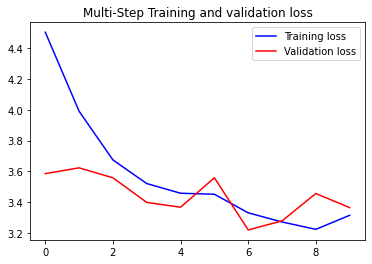

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
train.columns

Index(['category_9bf31c7ff062936a96d3c8bd1f8f2ff3',
       'category_a5bfc9e07964f8dddeb95fc584cd965d',
       'category_b6d767d2f8ed5d21a44b0e5886680cb9',
       'category_1ff1de774005f8da13f42943881c655f',
       'category_44f683a84163b3523afe57c2e008bc8c', 'count',
       'category_fbd7939d674997cdb4692d34de8633c4',
       'category_f457c545a9ded88f18ecee47145a72c0',
       'category_34173cb38f07f89ddbebc2ac9128303f',
       'category_6512bd43d9caa6e02c990b0a82652dca',
       'category_a5771bce93e200c36f7cd9dfd0e5deaa',
       'category_33e75ff09dd601bbe69f351039152189',
       'category_6f4922f45568161a8cdf4ad2299f6d23',
       'category_37693cfc748049e45d87b8c7d8b9aacd', 'start_date',
       'Promo_type_Biweekly', 'category_d82c8d1619ad8176d665453cfb2e55f0',
       'category_6c8349cc7260ae62e3b1396831a8398f', 'Promo_type_Seasonal',
       'category_6ea9ab1baa0efb9e19094440c317e21b', 'Promo_type_Facades',
       'category_a1d0c6e83f027327d8461063f4ac58a6',
       'category_c16a5320

In [ ]:
ready_test['month'] = ready_test['start_date'].map(lambda x: x.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
train

,category_9bf31c7ff062936a96d3c8bd1f8f2ff3,category_a5bfc9e07964f8dddeb95fc584cd965d,category_1ff1de774005f8da13f42943881c655f,category_b6d767d2f8ed5d21a44b0e5886680cb9,category_44f683a84163b3523afe57c2e008bc8c,count,category_fbd7939d674997cdb4692d34de8633c4,category_f457c545a9ded88f18ecee47145a72c0,category_6512bd43d9caa6e02c990b0a82652dca,category_34173cb38f07f89ddbebc2ac9128303f,category_a5771bce93e200c36f7cd9dfd0e5deaa,category_33e75ff09dd601bbe69f351039152189,category_6f4922f45568161a8cdf4ad2299f6d23,category_37693cfc748049e45d87b8c7d8b9aacd,start_date,Promo_type_Biweekly,category_d82c8d1619ad8176d665453cfb2e55f0,category_6c8349cc7260ae62e3b1396831a8398f,Promo_type_Seasonal,category_6ea9ab1baa0efb9e19094440c317e21b,Promo_type_Facades,category_a1d0c6e83f027327d8461063f4ac58a6,category_c16a5320fa475530d9583c34fd356ef5,category_c51ce410c124a10e0db5e4b97fc2af39,end_date,category_d645920e395fedad7bbbed0eca3fe2e0,category_fc490ca45c00b1249bbe3554a4fdf6fb,category_e369853df766fa44e1ed0ff613f563bd,category_1c383cd30b7c298ab50293adfecb7b18,category_8e296a067a37563370ded05f5a3bf3ec,category_182be0c5cdcd5072bb1864cdee4d3d6e,category_d67d8ab4f4c10bf22aa353e27879133c,category_19ca14e7ea6328a42e0eb13d585e4c22,Promo_type_Billboards,category_6364d3f0f495b6ab9dcf8d3b5c6e0b01,category_c20ad4d76fe97759aa27a0c99bff6710,days,category_f7177163c833dff4b38fc8d2872f1ec6,category_17e62166fc8586dfa4d1bc0e1742c08b,month,UpLift
685,0.0,0.0,0.0,0.0,0.0,517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-24,0,517.0,0.0,1,0.0,0,0.0,0.0,0.0,2019-10-07,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14,0.0,0.0,9,8.690918
568,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-24,0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,2019-10-07,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14,0.0,0.0,9,17.189989
723,0.0,0.0,0.0,0.0,0.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-24,0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,2019-10-07,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14,0.0,0.0,9,6.699233
724,0.0,0.0,0.0,0.0,0.0,225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-24,0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,2019-10-07,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14,0.0,0.0,9,15.601001
725,0.0,0.0,0.0,0.0,0.0,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-24,0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,2019-10-07,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14,0.0,0.0,9,19.979078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0.0,0.0,0.0,0.0,0.0,2554,0.0,0.0,0.0,0.0,0.0,0.0,2554.0,0.0,2020-09-10,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,2020-09-16,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,7,0.0,0.0,9,0.375943
120,0.0,0.0,0.0,0.0,0.0,337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-10,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,2020-09-16,0.0,0.0,0,0.0,0.0,0.0,337.0,0.0,0,0.0,0.0,7,0.0,0.0,9,0.436841
557,0.0,0.0,69.0,0.0,0.0,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-10,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,2020-09-16,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,7,0.0,0.0,9,3.088375
287,0.0,0.0,0.0,0.0,0.0,605,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0.0,2020-09-10,0,0.0,0.0,0,0.0,1,0.0,298.0,0.0,2020-09-16,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,7,0.0,0.0,9,0.875797


In [ ]:
ready_test[train.drop(['UpLift', 'start_date', 'end_date'], axis=1).columns]

,category_9bf31c7ff062936a96d3c8bd1f8f2ff3,category_a5bfc9e07964f8dddeb95fc584cd965d,category_1ff1de774005f8da13f42943881c655f,category_b6d767d2f8ed5d21a44b0e5886680cb9,category_44f683a84163b3523afe57c2e008bc8c,count,category_fbd7939d674997cdb4692d34de8633c4,category_f457c545a9ded88f18ecee47145a72c0,category_6512bd43d9caa6e02c990b0a82652dca,category_34173cb38f07f89ddbebc2ac9128303f,category_a5771bce93e200c36f7cd9dfd0e5deaa,category_33e75ff09dd601bbe69f351039152189,category_6f4922f45568161a8cdf4ad2299f6d23,category_37693cfc748049e45d87b8c7d8b9aacd,Promo_type_Biweekly,category_d82c8d1619ad8176d665453cfb2e55f0,category_6c8349cc7260ae62e3b1396831a8398f,Promo_type_Seasonal,category_6ea9ab1baa0efb9e19094440c317e21b,Promo_type_Facades,category_a1d0c6e83f027327d8461063f4ac58a6,category_c16a5320fa475530d9583c34fd356ef5,category_c51ce410c124a10e0db5e4b97fc2af39,category_d645920e395fedad7bbbed0eca3fe2e0,category_fc490ca45c00b1249bbe3554a4fdf6fb,category_e369853df766fa44e1ed0ff613f563bd,category_1c383cd30b7c298ab50293adfecb7b18,category_8e296a067a37563370ded05f5a3bf3ec,category_182be0c5cdcd5072bb1864cdee4d3d6e,category_d67d8ab4f4c10bf22aa353e27879133c,category_19ca14e7ea6328a42e0eb13d585e4c22,Promo_type_Billboards,category_6364d3f0f495b6ab9dcf8d3b5c6e0b01,category_c20ad4d76fe97759aa27a0c99bff6710,days,category_f7177163c833dff4b38fc8d2872f1ec6,category_17e62166fc8586dfa4d1bc0e1742c08b,month
0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22,0,0,0,0,7,0,0,11
1,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,14,0,0,10
2,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,7,0,0,10
3,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,12
4,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23,0,0,0,0,0,0,0,0,0,0,8,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,14,0,0,10
145,0,0,0,0,0,79,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,77,0,0,0,0,14,2,0,10
146,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,14,0,0,10
147,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,10


In [ ]:
train_scaled = scaler.fit_transform(train.drop(['start_date', 'end_date'], axis=1))

In [ ]:
X, y = np.array(train.drop(['UpLift', 'start_date', 'end_date'], axis=1)), np.array(train['UpLift'])

In [ ]:
X_test = ready_test[train.drop(['UpLift',  'end_date'], axis=1).columns]

In [ ]:
X_test['UpLift'] = np.zeros(149)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((X.reshape(X.shape[0],  X.shape[1], 1), y))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()



In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=[X.shape[1], 1]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(1))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=5,
                                          steps_per_epoch=EVALUATION_INTERVAL,
)

Epoch 1/5
300/300 [==============================] - 16s 43ms/step - loss: 4.2537
Epoch 2/5
300/300 [==============================] - 13s 44ms/step - loss: 4.0118
Epoch 3/5
300/300 [==============================] - 13s 44ms/step - loss: 3.7581
Epoch 4/5
300/300 [==============================] - 13s 43ms/step - loss: 3.5963
Epoch 5/5
300/300 [==============================] - 14s 46ms/step - loss: 3.5022


In [ ]:
X_test = np.array(X_test.sort_values(['start_date']).drop(['start_date'], axis=1))

In [ ]:
y_pred = multi_step_model.predict(X_test.reshape(X_test.shape[0],  X_test.shape[1], 1))

In [ ]:
y_pred

array([[ 4.6172333e+00],
       [ 5.0474358e+00],
       [ 3.9556348e+00],
       [ 4.5508156e+00],
       [ 2.2252471e+00],
       [ 4.7680430e+00],
       [ 3.8457439e+00],
       [ 6.9341025e+00],
       [ 1.6910198e+00],
       [ 7.7043400e+00],
       [ 2.2167175e+00],
       [ 2.0397136e+00],
       [ 5.5525756e+00],
       [ 2.1030433e+00],
       [ 4.0800481e+00],
       [ 3.7958210e+00],
       [ 1.8797443e+00],
       [ 5.1746244e+00],
       [ 1.9802310e+00],
       [-2.5173581e+00],
       [ 1.8797443e+00],
       [ 2.1744182e+00],
       [ 4.5839562e+00],
       [ 3.1360366e+00],
       [ 4.1442618e+00],
       [ 6.5860524e+00],
       [-3.5430962e+01],
       [ 4.7589417e+00],
       [ 6.1727338e+00],
       [ 1.9326923e+00],
       [-3.7572624e+01],
       [-2.2888971e+01],
       [ 6.7194662e+00],
       [ 3.1360366e+00],
       [ 2.8362472e+00],
       [ 2.9045093e+00],
       [ 2.7564237e+00],
       [ 4.8998675e+00],
       [-1.5201123e+00],
       [ 1.9271019e+00],


In [ ]:
res_df = pd.DataFrame({'Offer_ID': ready_test.sort_values(['start_date'])['Offer_ID'], 'UpLift': y_pred.reshape(149)})

In [ ]:
ss = pd.read_csv('/content/20210521_sample_submission.csv')

In [ ]:
res_df = ss.merge(res_df, on=['Offer_ID']).drop(['UpLift_x'], axis = 1)

In [ ]:
res_df.columns = ['Offer_ID', 'UpLift']

In [ ]:
res_df.to_csv('submit_lenta_9.csv', index=False)

In [ ]:
pd.read_csv('/content/submit_lenta_9.csv')

,Offer_ID,UpLift
0,386,3.625404
1,182,6.088385
2,173,2.699683
3,375,6.274321
4,379,1.931651
...,...,...
144,536,2.051840
145,99,4.550816
146,100,5.047436
147,95,2.225247


In [ ]:
import pandas as pd

In [ ]:
off = pd.read_csv('/content/20210521_offers.csv')
upl = pd.read_csv('/content/20210518_uplift.csv')

In [ ]:
off.start_date = pd.to_datetime(off.start_date.map(lambda x: str(x)[:4] + '-'+str(x)[4:6]+'-'+str(x)[6:]))

In [ ]:
off.end_date = pd.to_datetime(off.end_date.map(lambda x: str(x)[:4] + '-'+str(x)[4:6]+'-'+str(x)[6:]))

In [ ]:
train = off[off.train_test_group == 'train'].drop(['train_test_group'], axis=1)

In [ ]:
train = train.drop(['sku'], axis=1).drop_duplicates().sort_values(['start_date'])

In [ ]:
train = train.merge(upl, on=['Offer_ID']).sort_values(['start_date'])

In [ ]:
import numpy as np
train_uplift = np.array(train['UpLift'])

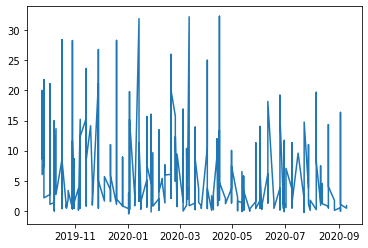

In [ ]:
plt.plot(train['start_date'][::2], train_uplift[::2])

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
train_scale = scaler.fit_transform(np.array(train_uplift).reshape(-1, 1))

In [ ]:
X_time, y_time = [], []
for i in range(24, 740):
    X_time.append(train_uplift[i-24:i])
    y_time.append(train_uplift[i])

In [ ]:
X_time, y_time = np.array(X_time), np.array(y_time)

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=[X_time.shape[1], 1]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((X_time.reshape(X_time.shape[0], X_time.shape[1], 1), y_time))
train_data_single = train_data_single.cache().shuffle(1000).batch(256).repeat()

In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=10,
                                            steps_per_epoch=300,)

Epoch 1/10
300/300 [==============================] - 9s 4ms/step - loss: 4.2656
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 4.1346
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 4.0237
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 3.9330
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 3.8506
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 3.7723
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 3.6909
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 3.6083
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 3.5262
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 3.4384


In [ ]:
X_test = y_time[-24:]

In [ ]:
X_test.shape

(40,)

In [ ]:
y_pred = []
for i in range(149):
  pred = single_step_model.predict(X_test.reshape(1, X_test.shape[0], 1).astype(float))
  print(pred)
  y_pred.append(pred[0][0])
  X_test = np.array(list(X_test)[1:] + list(pred[0]))

[[-1.5169643]]
[[0.56931394]]
[[1.6326733]]
[[1.1198864]]
[[1.0586839]]
[[1.5567209]]
[[2.1480901]]
[[4.611166]]
[[6.3253493]]
[[5.186191]]
[[3.074622]]
[[0.03320919]]
[[0.60579973]]
[[0.5394455]]
[[0.44125473]]
[[0.63953656]]
[[0.6654065]]
[[0.7370904]]
[[0.7869969]]
[[0.84059966]]
[[0.895878]]
[[4.3498707]]
[[7.225669]]
[[6.1592264]]
[[0.38161945]]
[[1.8334503]]
[[6.552726]]
[[6.132186]]
[[4.8017006]]
[[2.740086]]
[[2.2306287]]
[[2.2957165]]
[[2.615209]]
[[2.138497]]
[[6.1167374]]
[[-0.03062882]]
[[0.9941275]]
[[0.64953893]]
[[0.830689]]
[[0.88018227]]
[[4.316862]]
[[3.2371469]]
[[5.4527817]]
[[5.3258305]]
[[7.524158]]
[[7.4360127]]
[[4.273766]]
[[1.7806392]]
[[2.580057]]
[[5.571567]]
[[5.040399]]
[[3.332156]]
[[3.403741]]
[[3.9452007]]
[[4.1368794]]
[[4.2295623]]
[[5.395736]]
[[6.139836]]
[[5.296316]]
[[0.57965416]]
[[3.7506835]]
[[4.1143174]]
[[5.07716]]
[[9.310694]]
[[9.609621]]
[[8.87196]]
[[7.5376334]]
[[4.7647233]]
[[2.2590864]]
[[2.6622107]]
[[4.939243]]
[[8.094944]]
[[9.35860

In [ ]:
y_pred

[-1.5169643,
 0.56931394,
 1.6326733,
 1.1198864,
 1.0586839,
 1.5567209,
 2.1480901,
 4.611166,
 6.3253493,
 5.186191,
 3.074622,
 0.03320919,
 0.60579973,
 0.5394455,
 0.44125473,
 0.63953656,
 0.6654065,
 0.7370904,
 0.7869969,
 0.84059966,
 0.895878,
 4.3498707,
 7.225669,
 6.1592264,
 0.38161945,
 1.8334503,
 6.552726,
 6.132186,
 4.8017006,
 2.740086,
 2.2306287,
 2.2957165,
 2.615209,
 2.138497,
 6.1167374,
 -0.030628815,
 0.9941275,
 0.64953893,
 0.830689,
 0.88018227,
 4.316862,
 3.2371469,
 5.4527817,
 5.3258305,
 7.524158,
 7.4360127,
 4.273766,
 1.7806392,
 2.580057,
 5.571567,
 5.040399,
 3.332156,
 3.403741,
 3.9452007,
 4.1368794,
 4.2295623,
 5.395736,
 6.139836,
 5.296316,
 0.57965416,
 3.7506835,
 4.1143174,
 5.07716,
 9.310694,
 9.609621,
 8.87196,
 7.5376334,
 4.7647233,
 2.2590864,
 2.6622107,
 4.939243,
 8.094944,
 9.358607,
 5.6736712,
 6.869083,
 6.0489883,
 6.3729334,
 2.8585565,
 5.6939006,
 3.393388,
 6.329146,
 3.3237376,
 6.0392213,
 2.5159125,
 6.102037,
 

In [ ]:
res = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)).reshape(149)

In [ ]:
res_df = pd.DataFrame({'Offer_ID': off[off.train_test_group =='test'].drop(['sku'],axis=1).drop_duplicates().sort_values(['start_date'])['Offer_ID'], 'UpLift': y_pred})

In [ ]:
ss = pd.read_csv('/content/20210521_sample_submission.csv')

In [ ]:
res_df = ss.merge(res_df, on=['Offer_ID']).drop(['UpLift_x'], axis = 1)

In [ ]:
res_df.columns = ['Offer_ID', 'UpLift']

In [ ]:
res_df.to_csv('submit_lenta_100.csv', index=False)

In [ ]:
pd.read_csv('/content/submit_lenta_100.csv')

,Offer_ID,UpLift
0,386,6.571551
1,182,7.259575
2,173,3.323738
3,375,2.548702
4,379,3.689060
...,...,...
144,536,4.114317
145,99,1.119886
146,100,0.569314
147,95,1.058684


In [ ]:
single_step_model.save('lenta.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('lenta.h5')

In [ ]:
model.predict(X_test.reshape(1, X_test.shape[0], 1).astype(float))

array([[3.9746995]], dtype=float32)

In [ ]:
pd.DataFrame({'UpLift': X_test}).to_csv('example.csv', index=False)